# ID No :- 20191COM0203

  Name :-  Kishan Chand.T

  Sec  :-  5COM04

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib 
import seaborn as sns
import numpy as np
from subprocess import check_output
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline


#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [5]:
# Location of file
#Location = '../input/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'
import pandas as pd
df = pd.read_csv("/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")



In [6]:
display(df)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,NaN,NaN,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,NaN,NaN,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,NaN,NaN,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,NaN,NaN,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,NaN,NaN,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43418,2015,2015,OR,Oregon,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,41.2,41.2,NaN,NaN,33.5,49.4,184.0,NaN,NaN,NaN,NaN,NaN,Hispanic,"(44.56744942400047, -120.15503132599969)",PA,PA1,Q043,VALUE,41.0,Race/Ethnicity,Hispanic,RACE,RACEHIS
43419,2015,2015,OR,Oregon,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,61.0,61.0,NaN,NaN,53.5,68.1,255.0,NaN,NaN,NaN,NaN,NaN,2 or more races,"(44.56744942400047, -120.15503132599969)",PA,PA1,Q043,VALUE,41.0,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
43420,2015,2015,OR,Oregon,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,62.3,62.3,NaN,NaN,60.3,64.2,3861.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,"(44.56744942400047, -120.15503132599969)",PA,PA1,Q043,VALUE,41.0,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
43421,2015,2015,OR,Oregon,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,NaN,Value,77.6,77.6,NaN,NaN,64.6,86.8,65.0,NaN,NaN,NaN,NaN,NaN,Asian,"(44.56744942400047, -120.15503132599969)",PA,PA1,Q043,VALUE,41.0,Race/Ethnicity,Asian,RACE,RACEASN


In [7]:
df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,NaN,NaN,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,NaN,NaN,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,NaN,NaN,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,NaN,NaN,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,NaN,NaN,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,High school graduate,EDU,EDUHSGRAD


In [8]:
#Getting Rid of All Extraneous Info

df.drop(['Low_Confidence_Limit','High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);


In [9]:
#Create separate Dataform from df by gender df2, by education level dfedu, and by income dfedu

df2=df[(df['Stratification1']=='Male')|(df['Stratification1']=='Female')]
dfedu=df[df['StratificationCategory1']=='Education']
dfinc=df[df['StratificationCategory1']=='Income']

#reset index for each of the new dataforms

df2 = df2.reset_index(drop = True)
dfedu = dfedu.reset_index(drop = True)
dfinc = dfinc.reset_index(drop = True)

In [10]:
#Each category has the same survey questions

df2['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
     

In [11]:
#here we are interested in the survey question directly about obesity and overweight percent

X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']


df2=df2[df2['Question']==X[0]]

#In case we wanted both. df3=df2[df2['Question'].apply(lambda x: x in X)]

In [12]:
#survey data covers 2011 - 2014 (all states) or 2016 most states
#choose 2014 since it has the most data 

df2=df2[df2['YearStart']==2014]

#separate out national so that we can calculate the national obesity rate for 2014
df2n=df2[(df2['LocationDesc']=='National')]

#Cut out terriotories that our not included within 50 states + DC data
df2=df2[~(df2['LocationDesc']=='National')]
df2=df2[~(df2['LocationDesc']=='Guam')]
df2=df2[~(df2['LocationDesc']=='Puerto Rico')]
df2['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'District of Columbia', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nevada', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [13]:
#group data by state and take the mean of men and women rates for each state

sorted_df = df2.sort_values(['LocationDesc'], ascending = [True])
sorted_df=sorted_df[['LocationAbbr','LocationDesc','Data_Value','Gender']]
sorted_df = sorted_df.groupby('LocationDesc', as_index=False).mean()

#calculate the average (over men and women) obesity rate for the country

natmeanobesity2014=sum(df2n['Data_Value'])/len(df2n)
print(natmeanobesity2014)

28.9


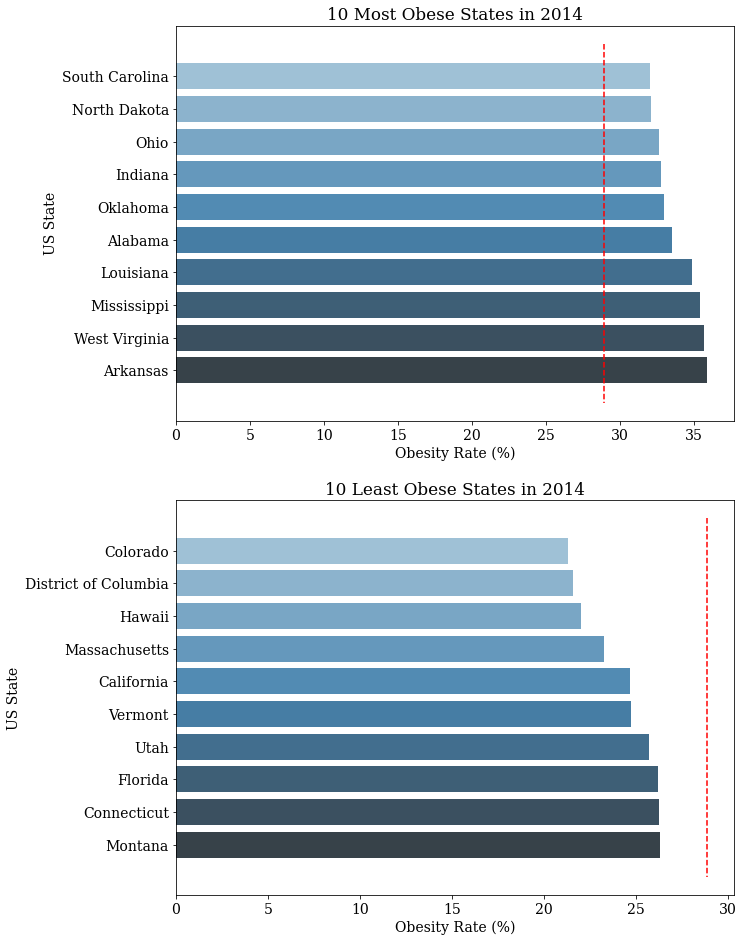

In [15]:
#Let's plot a bar graph of the most and least obese states in the US
#Mark the national average in red

#For those that have LaTex
#plt.rc('text', usetex=True)

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

sorted_df = sorted_df.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_df.tail(10).LocationDesc,x=sorted_df.tail(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States in 2014')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,10], '--',color = 'r')

plt.subplot(2,1,2)
ax=sns.barplot(y=sorted_df.head(10).LocationDesc,x=sorted_df.head(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Least Obese States in 2014')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,10], '--',color = 'r')



In [17]:
!pip install plotly


In [20]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.6 MB/s 


In [ ]:


sorted_df = df2.sort_values(['LocationDesc'], ascending = [True])
sorted_df=sorted_df[['LocationAbbr','LocationDesc','Data_Value','Gender']]
sorted_df2 = sorted_df.groupby('LocationAbbr', as_index=False).mean()
#Let's make a map to see the geographic locations of the obesity rates

import chart_studio.plotly as py


scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


data = [ dict(
        type='choropleth',
        colorscale = 'YlOrRd',
        autocolorscale = False,
        reversescale = True,
        locations = sorted_df2['LocationAbbr'],
        z = sorted_df2['Data_Value'].astype(float),
        locationmode = 'USA-states',
        text = sorted_df2['LocationAbbr'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% Obesity")
        ) ]

layout = dict(
        #title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename ='somename' )
raise exceptions.PlotlyRequestError( fig, filename ='somename' )

In [23]:
#Now let's explore if obesity is somehow correlated with education level

dfedu.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,NaN,NaN,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Less than high school,EDU,EDUHS
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,NaN,NaN,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,High school graduate,EDU,EDUHSGRAD
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.8,33.8,NaN,NaN,31.0,36.8,1925.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Some college or technical school,EDU,EDUCOTEC
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,26.4,26.4,NaN,NaN,23.7,29.3,1812.0,NaN,NaN,College graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,College graduate,EDU,EDUCOGRAD
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.2,33.2,NaN,NaN,29.2,37.5,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,VALUE,1.0,Education,Less than high school,EDU,EDUHS


In [24]:
#Just like for the gender one, we need to isolate just the obesity question and the year


X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']

#df3=df2[df2['Question'].apply(lambda x: x in X)]
dfedu=dfedu[dfedu['Question']==X[0]]
dfedu=dfedu[dfedu['YearStart']==2014]

#Cut out all locations that aren't within the 50 states + DC
dfedu=dfedu[~(dfedu['LocationDesc']=='National')]
dfedu=dfedu[~(dfedu['LocationDesc']=='Guam')]
dfedu=dfedu[~(dfedu['LocationDesc']=='Puerto Rico')]
dfedu['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [25]:
#select the four relevant columns to analyze the obesity rate versus educational level

dfedu = dfedu.reset_index(drop = True)
dfedu=dfedu[['YearStart','LocationDesc','Data_Value','Education']]
dfedu.head(10)

,YearStart,LocationDesc,Data_Value,Education
0,2014,Alabama,34.8,Less than high school
1,2014,Alabama,35.4,High school graduate
2,2014,Alabama,34.4,Some college or technical school
3,2014,Alabama,28.1,College graduate
4,2014,Alaska,32.8,Less than high school
5,2014,Alaska,28.3,High school graduate
6,2014,Alaska,34.0,Some college or technical school
7,2014,Alaska,23.4,College graduate
8,2014,Arizona,32.1,Less than high school
9,2014,Arizona,29.8,High school graduate


In [26]:
#Create a list of all 4 educational levels
ledu=dfedu.Education.unique()


#want to treat education levels as dummy variables, so this assigns 1 or 0 depending on the group
for i in ledu:
    dfedu[i]=dfedu['Education'].apply(lambda x: int(x==i))


In [27]:
#select the four relevant columns to analyze the obesity rate versus educational level

dfedu = dfedu.reset_index(drop = True)
dfedu=dfedu[['YearStart','LocationDesc','Data_Value','Education']]
dfedu.head(10)

,YearStart,LocationDesc,Data_Value,Education
0,2014,Alabama,34.8,Less than high school
1,2014,Alabama,35.4,High school graduate
2,2014,Alabama,34.4,Some college or technical school
3,2014,Alabama,28.1,College graduate
4,2014,Alaska,32.8,Less than high school
5,2014,Alaska,28.3,High school graduate
6,2014,Alaska,34.0,Some college or technical school
7,2014,Alaska,23.4,College graduate
8,2014,Arizona,32.1,Less than high school
9,2014,Arizona,29.8,High school graduate


In [28]:
#Create a list of all 4 educational levels
ledu=dfedu.Education.unique()


#want to treat education levels as dummy variables, so this assigns 1 or 0 depending on the group
for i in ledu:
    dfedu[i]=dfedu['Education'].apply(lambda x: int(x==i))


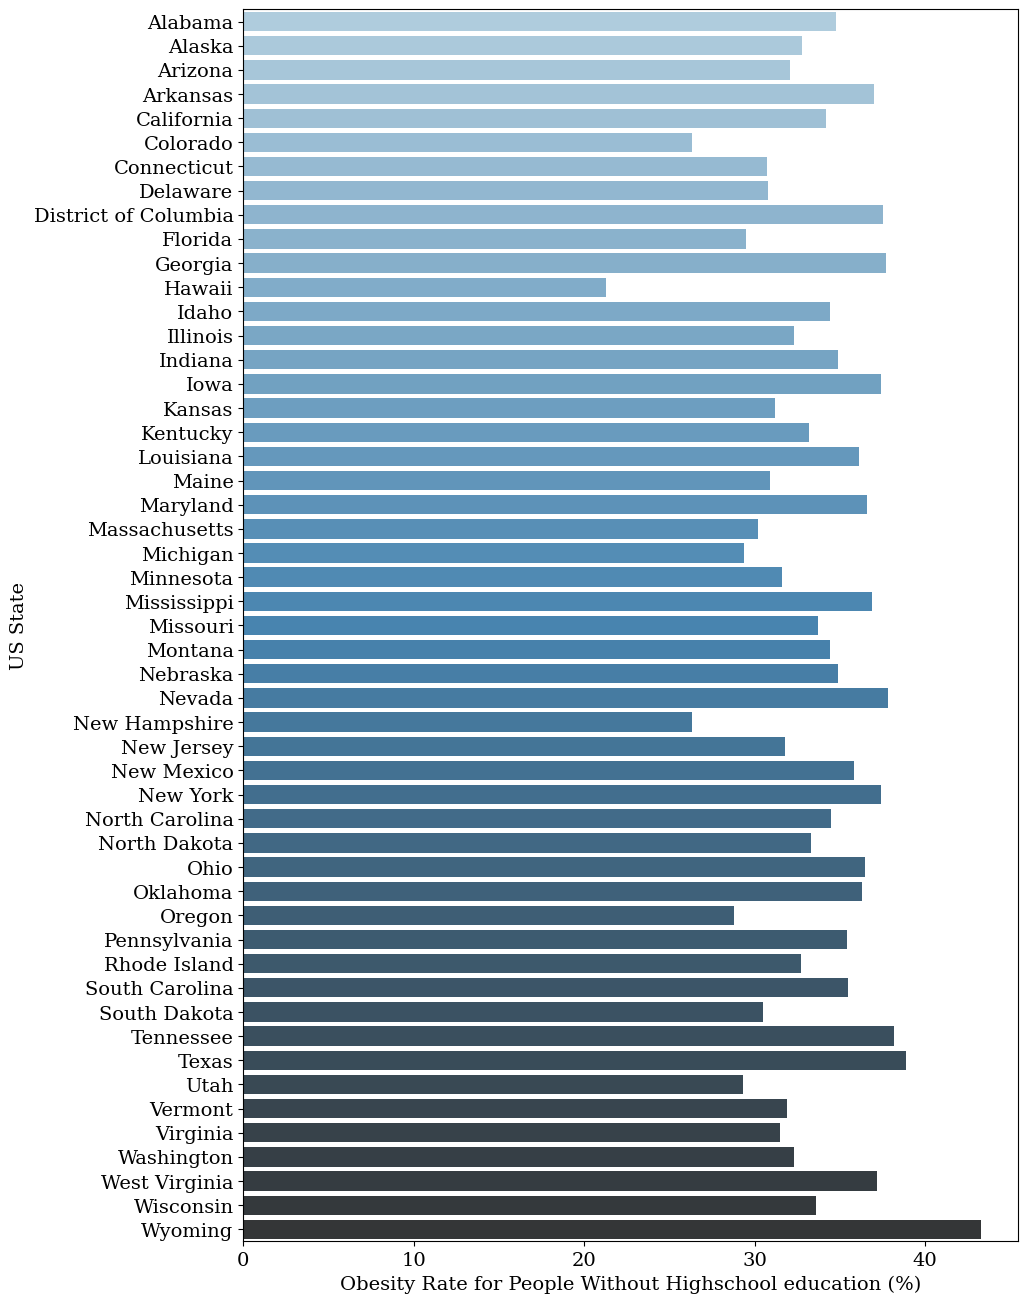

In [29]:
#Let's just take a look at how the obesity varies amongst states for those without highschool
#From the bar graph below, it is clear that Wyomming is an outlier. 

#plt.rc('text', usetex=True)
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})



dfeduLHS=dfedu[dfedu[ledu[0]]==1]
dfeduLHS = dfeduLHS.reset_index(drop = True)

plt.figure(figsize = (10,16))
ax=sns.barplot(y=dfeduLHS.LocationDesc,x=dfeduLHS.Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate for People Without Highschool education (%)')

plt.show()


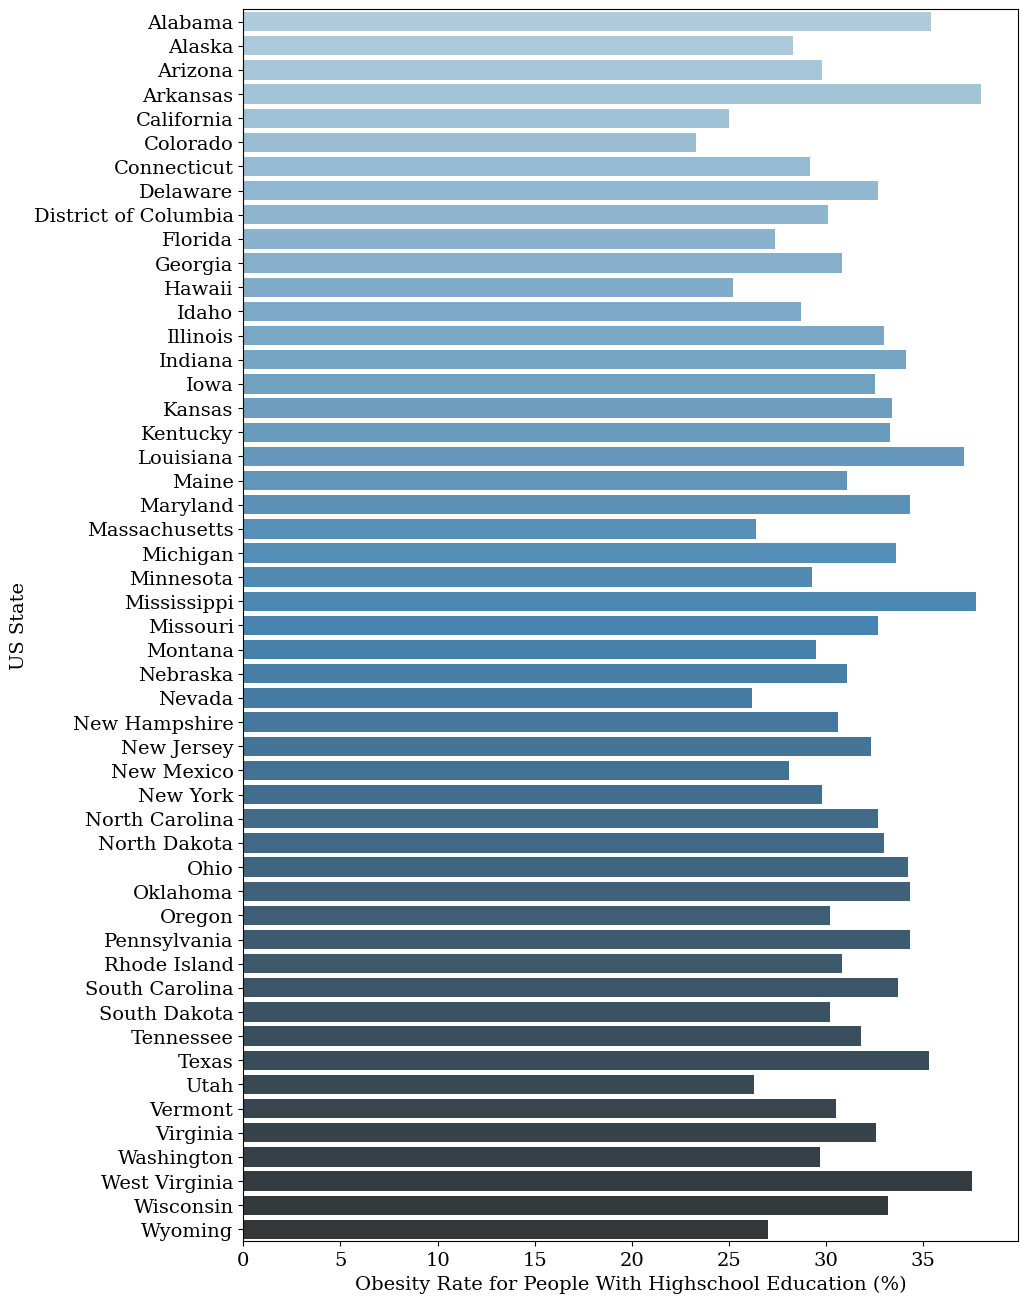

In [30]:
#Let's see how obesity compares for those with a HS education

dfeduHS=dfedu[dfedu[ledu[1]]==1]
dfeduHS = dfeduHS.reset_index(drop = True)


plt.figure(figsize = (10,16))
ax=sns.barplot(y=dfeduHS.LocationDesc,x=dfeduHS.Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate for People With Highschool Education (%)')


#plt.plot(df.non_weighted_all_weekly, df.M_weekly,'o')
#plt.plot(df.non_weighted_all_weekly, df.F_weekly,'o')
#plt.legend(['Males','Females'])
#plt.xlabel('Field Median Salary')
#plt.ylabel('Salary')
plt.show()

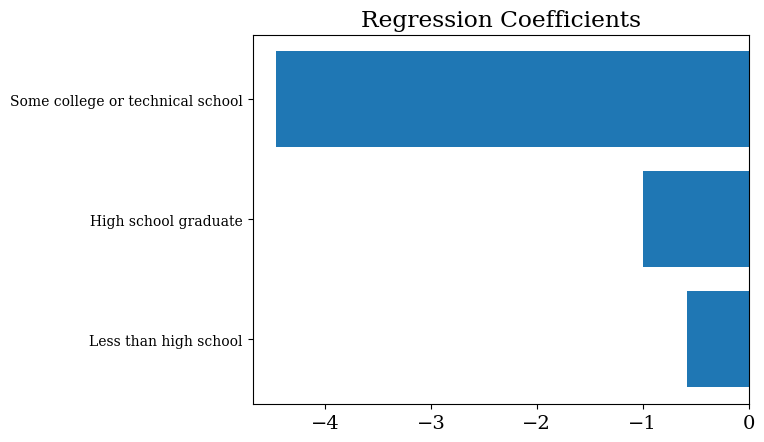

R^2 on training... 0.5711937281755715
R^2 on test... 0.34174921740844844
Model Coefficients [-0.58551882 -0.99814979 -4.46056074]
Model Coefficients 29.641131784881786


In [31]:
#Wyoming is an outlier AND has a small population and is very rural (i.e. different than other states) 
#I am going to take Wyoming it out of the Linear Regression Data Set without much harm

#Note that since I have 4 dummy variables, need only three coefficients 
dfedu=dfedu[~(dfedu['LocationDesc']=='Wyoming')]
model = LinearRegression()
columns = dfedu.columns[5:8]
X = dfedu[columns]

X_std = StandardScaler().fit_transform(X)
y = dfedu['Data_Value']

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.18, random_state=42)

model.fit(X_train,y_train)

plt.barh([0,1,2],model.coef_)
plt.yticks(range(3),dfedu.columns[4:7], fontsize = 10)
plt.title('Regression Coefficients')

plt.show()

#Regression R^2 value shows that lack of education has a "moderate" effect on obesity rate
print('R^2 on training...',model.score(X_train,y_train))
print('R^2 on test...',model.score(X_test,y_test))

print('Model Coefficients',model.coef_)
print('Model Coefficients',model.intercept_)

In [33]:
dfinc.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [34]:
#Now let's look at the effect income has on obesity

X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']

#df3=df2[df2['Question'].apply(lambda x: x in X)]
dfinc=dfinc[dfinc['Question']==X[0]]
dfinc=dfinc[dfinc['Question']==X[0]]
dfinc=dfinc[dfinc['YearStart']==2014]
dfinc=dfinc[~(dfinc['LocationDesc']=='National')]
dfinc=dfinc[~(dfinc['LocationDesc']=='Guam')]
dfinc=dfinc[~(dfinc['LocationDesc']=='Puerto Rico')]

dfinc['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [35]:
dfinc.Income.unique()

array(['Less than $15,000', '$15,000 - $24,999', '$25,000 - $34,999',
       '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 or greater',
       'Data not reported'], dtype=object)

In [36]:
dfinc = dfinc.reset_index(drop = True)
dfinc=dfinc[['YearStart','LocationDesc','Data_Value','Income']]

linc=dfinc.Income.unique()

#Create Dummy Variables from the income
for i in linc:
    dfinc[i]=dfinc['Income'].apply(lambda x: int(x==i))


dfinc=dfinc[~(dfinc.Income=='Data not reported')]


In [37]:
dfinc.head(10)

,YearStart,LocationDesc,Data_Value,Income,"Less than $15,000","$15,000 - $24,999","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",Data not reported
0,2014,Alabama,34.5,"Less than $15,000",1,0,0,0,0,0,0
1,2014,Alabama,40.6,"$15,000 - $24,999",0,1,0,0,0,0,0
2,2014,Alabama,35.4,"$25,000 - $34,999",0,0,1,0,0,0,0
3,2014,Alabama,35.5,"$35,000 - $49,999",0,0,0,1,0,0,0
4,2014,Alabama,32.4,"$50,000 - $74,999",0,0,0,0,1,0,0
5,2014,Alabama,31.0,"$75,000 or greater",0,0,0,0,0,1,0
7,2014,Alaska,31.5,"Less than $15,000",1,0,0,0,0,0,0
8,2014,Alaska,29.6,"$15,000 - $24,999",0,1,0,0,0,0,0
9,2014,Alaska,32.9,"$25,000 - $34,999",0,0,1,0,0,0,0
10,2014,Alaska,36.0,"$35,000 - $49,999",0,0,0,1,0,0,0


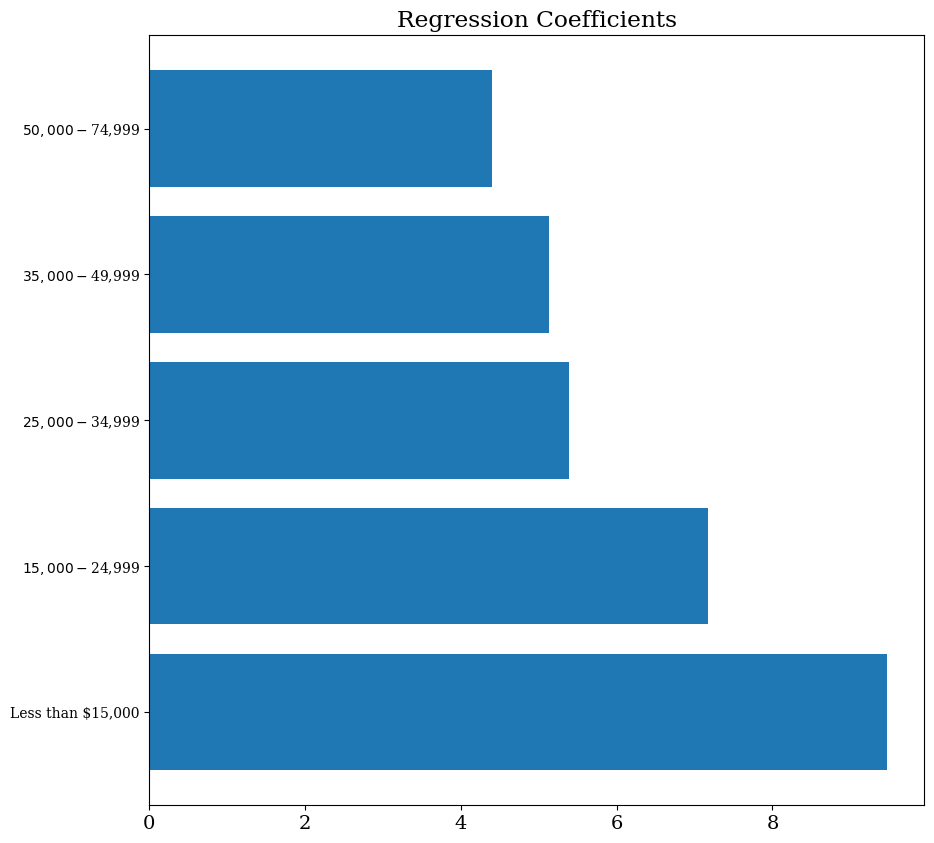

R^2 on training... 0.35561284616666805
R^2 on test... 0.26894396537457965
Model Coefficients [9.47454545 7.16880952 5.38547619 5.13447368 4.395     ]
Model Coefficients 25.555000000000003


In [43]:
#Let's test out whether income has an effect on obesity



model = LinearRegression()
columns = dfinc.columns[4:9]
X = dfinc[columns]

#X_std = StandardScaler().fit_transform(X)
y = dfinc['Data_Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

model.fit(X_train,y_train)

plt.figure(figsize = (10,10))
plt.barh([0,1,2,3,4],model.coef_)
plt.yticks(range(5),dfinc.columns[4:9], fontsize = 10)
plt.title('Regression Coefficients')

plt.show()

#Yikes!  Such low regression coefficients illustrate that there is only a weak effect if any
print('R^2 on training...',model.score(X_train,y_train))
print('R^2 on test...',model.score(X_test,y_test))

print('Model Coefficients',model.coef_)
print('Model Coefficients',model.intercept_)  

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(X_test.shape)

In [39]:
dfavginc = dfinc.groupby('Income', as_index=False).mean()

(0.0, 38.0)

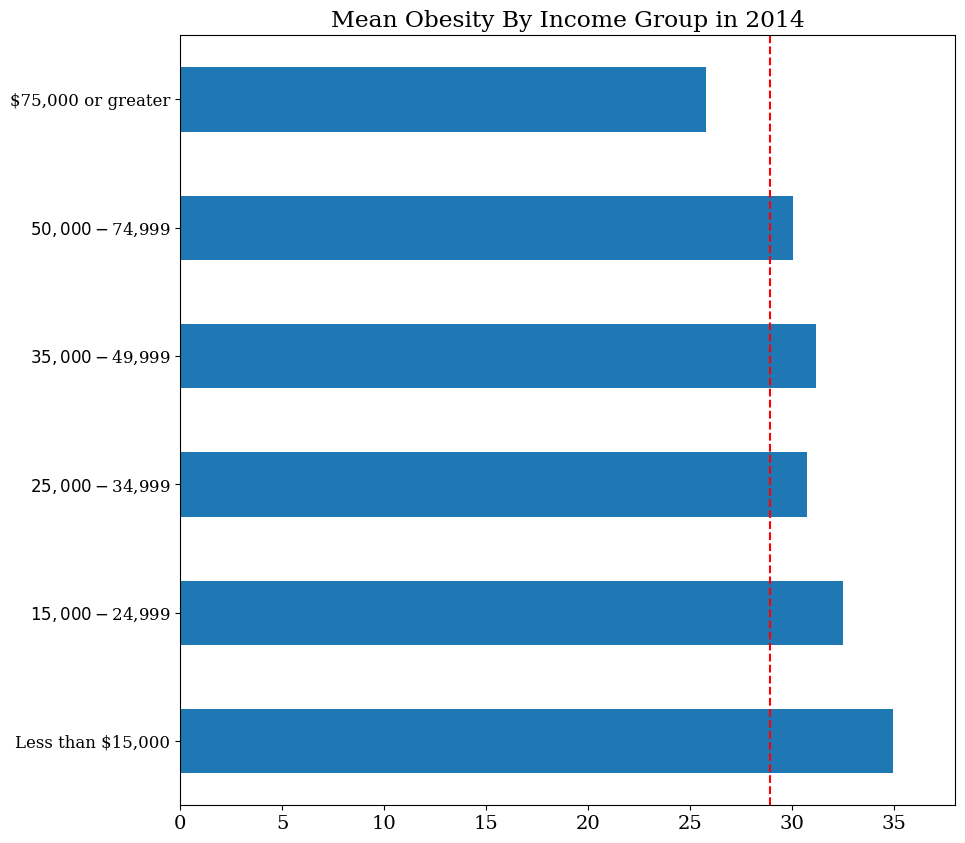

In [40]:
#Let's look out the mean obesity rate for each income category to investigate

dfavginc['IncomeOrder']=[1,2,3,4,5,0]


sorted_df = dfavginc.sort_values(['IncomeOrder'], ascending = [True])
plt.figure(figsize = (10,10))



#National average marked in red
#From this graph, we see that obesity doesn't monotonically decrease with increasing income.  
##In a sense, these income categories really depend on the cost of living in each state.  
#For example, $75K will buy you a lot in MS and places you in high income bracket, but not necessarily in MA   

sorted_df.Data_Value.plot(kind='barh')

plt.yticks(range(6),sorted_df.Income, fontsize = 12,family='serif')
plt.plot([natmeanobesity2014,natmeanobesity2014],[-0.5,5.5], '--',color = 'r')
plt.title('Mean Obesity By Income Group in 2014',family='serif')
plt.xlim([0,38])


In [ ]:
from sklearn.metrics import r2_score ,mean_squared_error
import numpy as np

predicted_Y = ipl_mlr_mod1.predict(test_X)
print("r2_score",np.abs(r2_score(predicted_Y, test_Y )))
print("RMSE is ",np.sqrt(mean_squared_error(predicted_Y, test_Y)))